#### 모델링 : 함수 찾기  
 - 집의 평수를 알며 가격을 알 수 있을까?  
 - Y = aX + b   
 - 데이터를 잘 설명하는 직선 하나를 찾는 것이 모델링  

#### 손으로 숫자를 그린 이미지를 보고 숫자 7인지 1인지 맞을 수 있을까?  
 - 아주 복잡한 결정경계를 그린다. 경계를 그려주는 함수를 찾아내는 과정  

#### ANN(인공신경망)
 - 단일층 : 신경망이 하나인 인공신경망 퍼셉트론 1X1 -> 뉴런#
 - 다중층 

 ---

##### 활성화 함수 - 뉴런이 얼마나 활성화 될지를 결정하는 함수
-> 입력 신호의 합(_가중합)을 받아서 출력 신호를 결정하는 역할

- 활성화 함수가 필요한 이유
  - 비선형성을 주기 위해 : 활성화 함수가 없다면 신경망은 단순히 선형 방정식. 여러층을 쌓아도 결국 하나의 선형 함수로 합쳐진다

- 활성화 함수종류
- 계단함수 : 뉴런이 발화할지 말지를 결정하는 초기 형태의 활성화 함수
- 시그모이드 함수 : 연속적인 값을 출력 - 미분이 가능 - 오차를 역전파
- 활성화 함수가 없다면 f(z) = z
  - y = (W100 x ... W1)X --> 거대한 1층짜리 선형모델
  - 초기 활성화 함수
        - 계단 함수 if x > 0    1
                       x <=     0



- 계단함수

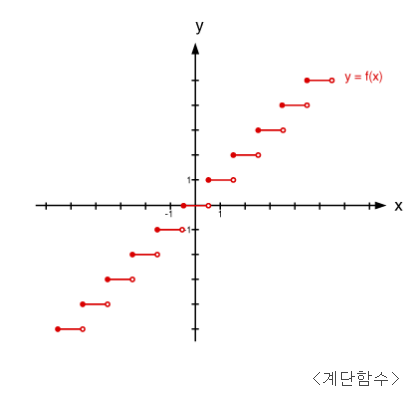


- 시그모이드 함수

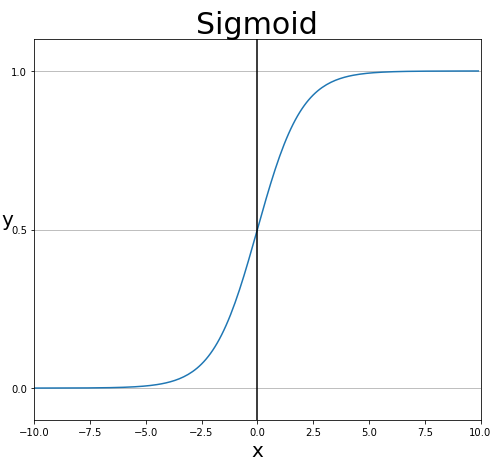

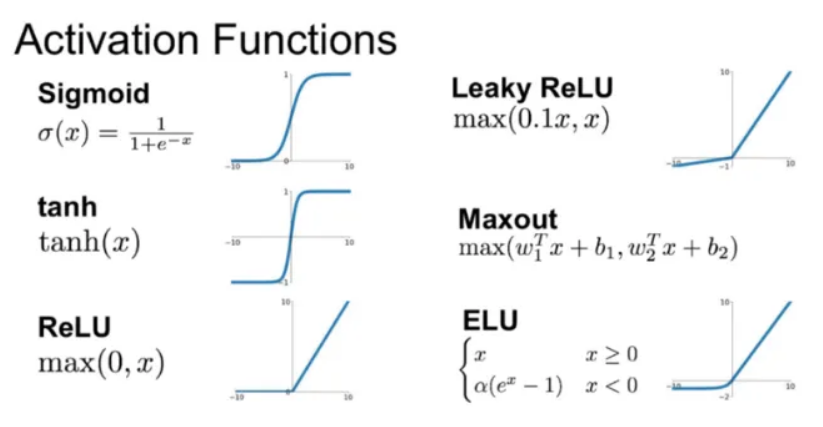


- 소프트 맥스

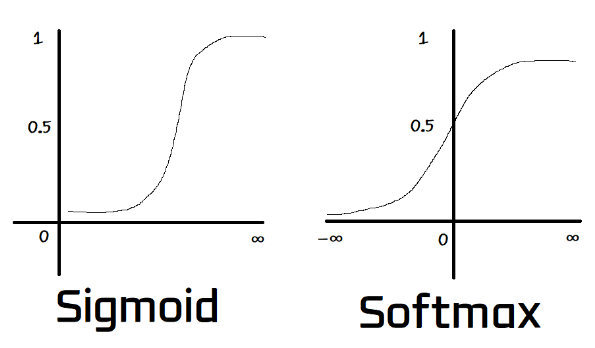

- 소프트 맥스 -> 전체 클래스 중에서 하나를 선택. 전체 중에 정답이 1개일 경우  
    - 확률 전체 클래스에 대해서 다 합치면 1이 되는 구조(0~1 사이의 값)   
- 시그모이드 함수 -> 다중클래스. 전체 중에 정답이 여러개일 수 있을 때  
    - 각 클래스에 대해서 확률을 0~1 사이로 변환  

##### 다층신경망 MLP 퍼셉트론을 여러개 쌓아서 올린구조
 - 입력층(input layer) : 데이터가 들어오는 곳 (뉴런수 데이터의 특성)
 - 은닉층(hidden layer) : 입력과 출력 사이에 있는 레이어
 - 출력층(output layer) :

 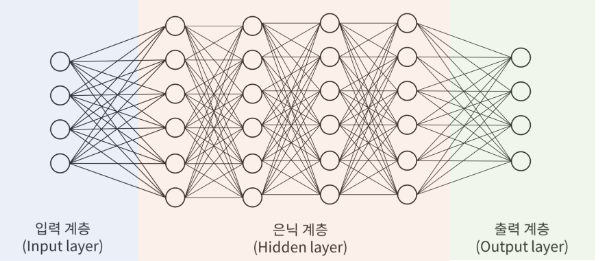

In [4]:
%conda install tensorflow

3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [41]:
# MNIST 데이터셋 로드
from sklearn.datasets import fetch_openml
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#X,y =fetch_openml('mnist_784',version=1, return_X_y=True, parser='auto')

In [42]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [43]:
np.unique(y_train,return_counts=True)       # 사람이 그린 숫자 이미지를 숫자로 표현한 것

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

3
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 

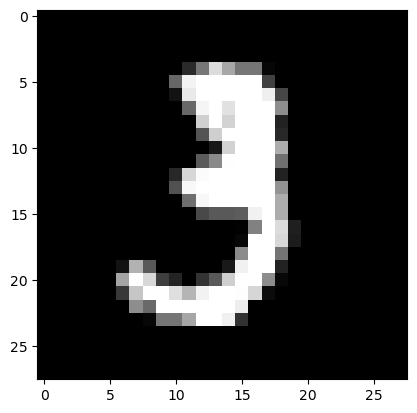

In [44]:
# 이미지 하나 예시로 확인
print(y_train[10])
plt.imshow(x_train[10],cmap ='gray')
print(x_train[10])

In [45]:
# 표준화        # 255로 나누는 이유는 이미지는 255를 넘을 수 없기 떄문에 255로 나누면 0~1의 값을 낼 수 있기 때문에 255로 고정
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [46]:
model = tf.keras.Sequential([
    # 1층 입력층    ((60000, 28, 28) 60000개의 데이터가 28x28로 1차원으로 만들어줘야 한다/   28x28 2D -> 782 1D로 만들어줘야 함
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # 은닉층 n개
    tf.keras.layers.Dense(128,activation='relu'),   # relu 기울기 소실문제 최소화
    # 마지막 출력층
    tf.keras.layers.Dense(10,activation='softmax')
])

model.summary()     # 100,480 = 784*128+128/ 1,290 = 128*10+10

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(
    optimizer = 'adam',     # 학습을 최적화해주는 것 adam -> 빠르고 안정적
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [48]:
history = model.fit(
    x_train,
    y_train,
    epochs = 20,
    validation_data = (x_test,y_test),
    verbose = 1      # 로그출력
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8801 - loss: 0.4245 - val_accuracy: 0.9538 - val_loss: 0.1469
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9635 - loss: 0.1266 - val_accuracy: 0.9725 - val_loss: 0.0956
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9752 - loss: 0.0819 - val_accuracy: 0.9722 - val_loss: 0.0881
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9812 - loss: 0.0612 - val_accuracy: 0.9758 - val_loss: 0.0804
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9858 - loss: 0.0455 - val_accuracy: 0.9754 - val_loss: 0.0763
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9898 - loss: 0.0350 - val_accuracy: 0.9782 - val_loss: 0.0730
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9917 - loss: 0.0269 - val_accuracy: 0.9757 - val_loss: 0.0777
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9932 - loss: 0.02

In [49]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

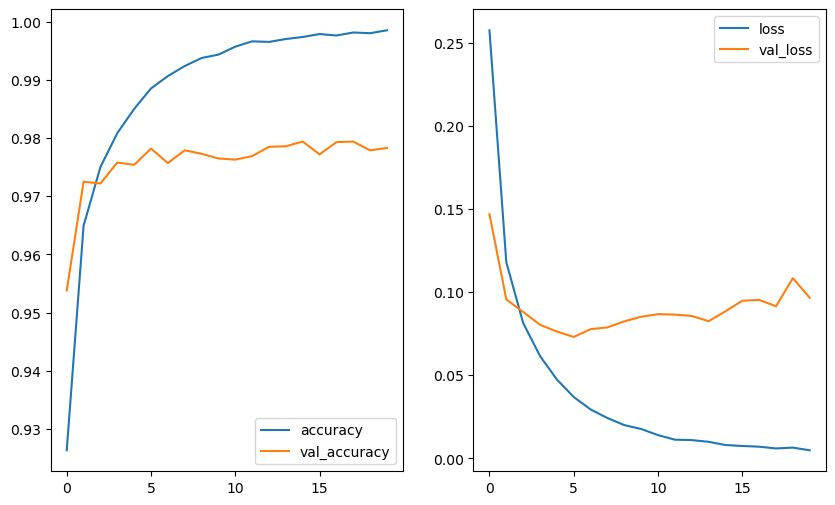

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.legend()

plt.show()


In [ ]:
pred = model.predict(x_test)
pred[10], y_test[10]    # 0일 확률이 1.0000000e+00(100%)즉 0이라는 숫
                        # 0번째가 np.uint8(0) 정답일 확률일 1.0000000e+00(100%)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(array([1.0000000e+00, 1.5142736e-23, 1.9101754e-09, 7.5535849e-15,
        1.0342973e-30, 3.5726101e-15, 6.0250951e-14, 4.3840067e-14,
        2.1322826e-18, 1.8158635e-12], dtype=float32),
 np.uint8(0))

In [ ]:
from sklearn.metrics import classification_report
print( classification_report(y_test,np.argmax(pred,axis=1)))  # 위에것을 report로

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.99      0.96      0.97       982
           5       0.97      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
model.evaluate(x_test,y_test)       # 손실값과 정확도 값을 알려준다

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9747 - loss: 0.1062


[0.09658659994602203, 0.9782999753952026]

---

#### 은닉층을 여러개 만들어서 할 수도 있음

In [ ]:
model = tf.keras.Sequential([
    # 1층 입력층    ((60000, 28, 28) 60000개의 데이터가 28x28로 1차원으로 만들어줘야 한다/   28x28 2D -> 782 1D로 만들어줘야 함
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # 은닉층 
    tf.keras.layers.Dense(128,activation='relu'),   # relu 기울기 소실문제 최소화
    # 은닉층 
    tf.keras.layers.Dense(64,activation='relu'),   
    # 은닉층 
    tf.keras.layers.Dense(32,activation='relu'),    
    # 마지막 출력층
    tf.keras.layers.Dense(10,activation='softmax')
])

model.summary()    